# INFORME PROYECTO SERVICIO AUTOMOTRIZ `"AUTO MOTORS"`

**Se desea Descripción del proyecto:**

Contamos con datos internos de la empresa como ventas y empleados. Requieren analizar `el impacto de la pandemia` para evaluar si ven der la empresa, si quiebra o si salir a buscar inversores para expansión hacia otros países.

**Objetivo:**

El cliente necesita contar con `toda la información` ya analizada para tomar una decisión final.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [2]:
data = pd.read_csv('Ventas.csv',sep=';',low_memory=False)
data.head()

,IdCliente,NombreCliente,Fecha,Empleado,Referencia,Descripcion,CodigoFamilia,Familia,Cantidad,Ventas,Localidad,Sede,Area
0,C1070956433,PINTO JOHN,1/9/2016,24.0,LL-2R-0038,PILOT STREET 110/80-17,101.0,LLANTA,1,129310,Puente aranda,Calle 13,35.0
1,C1032372566,CESAR CRUZ,1/9/2016,14.0,LL-TCA-0133,TOURING 175/70R13,101.0,LLANTA,2,181034,Suba,Suba,32.0
2,C2865810,PINEDA JAIME,1/9/2016,12.0,LL-TCA-0019,ENERGY XM2 185/65R14,101.0,LLANTA,1,193095,Usaquen,Santa ana,33.0
3,C11210285,VILLALBA RODRIGUEZ FABIO,1/9/2016,24.0,LL-TCA-0009,ENERGY XM2 165/65R13,101.0,LLANTA,2,262069,Puente aranda,Calle 13,35.0
4,C80755314,MOLINA RONALD,1/9/2016,14.0,LL-TCA-0132,NO UTILIZAR,101.0,LLANTA,4,362069,Suba,Suba,32.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   IdCliente      127255 non-null  object 
 1   NombreCliente  127255 non-null  object 
 2   Fecha          127255 non-null  object 
 3   Empleado       127255 non-null  float64
 4   Referencia     127255 non-null  object 
 5   Descripcion    127255 non-null  object 
 6   CodigoFamilia  127255 non-null  float64
 7   Familia        127255 non-null  object 
 8   Cantidad       127255 non-null  object 
 9   Ventas         127255 non-null  object 
 10  Localidad      127255 non-null  object 
 11  Sede           127256 non-null  object 
 12  Area           127255 non-null  float64
dtypes: float64(3), object(10)
memory usage: 104.0+ MB


In [4]:
data.describe(include='O')

,IdCliente,NombreCliente,Fecha,Referencia,Descripcion,Familia,Cantidad,Ventas,Localidad,Sede
count,127255,127255,127255,127255,127255,127255,127255,127255,127255,127256
unique,24122,21840,1066,1854,1814,5,214,14279,6,8
top,C860040576,COLTANQUES SAS,1/2/2019,SE-CS-1-0001,ALINEACION AUTO,SERVICIOS,1,33613,Engativa,Calle 80
freq,7964,7964,332,10127,10127,88230,84807,8311,67326,53052


## LIMPIEZA DE LOS DATOS

In [5]:
# Se revisan datos nulos
data.isnull().sum()

IdCliente        921320
NombreCliente    921320
Fecha            921320
Empleado         921320
Referencia       921320
Descripcion      921320
CodigoFamilia    921320
Familia          921320
Cantidad         921320
Ventas           921320
Localidad        921320
Sede             921319
Area             921320
dtype: int64

In [6]:
# Se eliminan nulos
data.dropna(inplace=True)
# Se revisan cantidad de registros despues de limpieza
data.shape

(127255, 13)

In [7]:
# Se modifica la columna de Ventas eliminando caracteres especiales encontrados
data.Ventas = data.Ventas.apply(lambda x: np.where(re.search(',',str(x)),re.sub('[\,\.]','',str(x))[:-2],str(x)))
# Se transforma a entero la columna
data.Ventas = data.Ventas.astype(int)

In [8]:
# Se verifica
data.Ventas.info()

<class 'pandas.core.series.Series'>
Int64Index: 127255 entries, 0 to 127254
Series name: Ventas
Non-Null Count   Dtype
--------------   -----
127255 non-null  int32
dtypes: int32(1)
memory usage: 1.5 MB


In [9]:
# Se modifica la columna de Cantidad eliminando caracteres especiales encontrados
data.Cantidad = data.Cantidad.apply(lambda x: int(re.sub(',','',x)))

In [10]:
# Se verifica
data.Cantidad.info()

<class 'pandas.core.series.Series'>
Int64Index: 127255 entries, 0 to 127254
Series name: Cantidad
Non-Null Count   Dtype
--------------   -----
127255 non-null  int64
dtypes: int64(1)
memory usage: 1.9 MB


In [11]:
# Creo columnas anuales
data.Fecha = pd.to_datetime(data.Fecha,format='%d/%m/%Y')
data['Año'] = data.Fecha.dt.year
data['Mes'] = data.Fecha.dt.month
data.head(2)

,IdCliente,NombreCliente,Fecha,Empleado,Referencia,Descripcion,CodigoFamilia,Familia,Cantidad,Ventas,Localidad,Sede,Area,Año,Mes
0,C1070956433,PINTO JOHN,2016-09-01,24.0,LL-2R-0038,PILOT STREET 110/80-17,101.0,LLANTA,1,129310,Puente aranda,Calle 13,35.0,2016,9
1,C1032372566,CESAR CRUZ,2016-09-01,14.0,LL-TCA-0133,TOURING 175/70R13,101.0,LLANTA,2,181034,Suba,Suba,32.0,2016,9


## KPI's de los datos

In [54]:
# Algunos datos generales de las ventas
def datos_ventas(datos):
    ventas_mean = datos.Ventas.mean()
    ventas_std = datos.Ventas.std()
    ventas_max = datos.Ventas.max()
    ventas_min = datos.Ventas.min()
    print(f' Promedio de las ventas totales: {ventas_mean}\n Desviación estandar de las ventas totales: {ventas_std}\n',
        f'Venta máxima: {ventas_max}\n Venta miníma: {ventas_min}')
datos_ventas(data)

 Promedio de las ventas totales: 584857.8177360418
 Desviación estandar de las ventas totales: 3251382.479163737
 Venta máxima: 220224601
 Venta miníma: 130


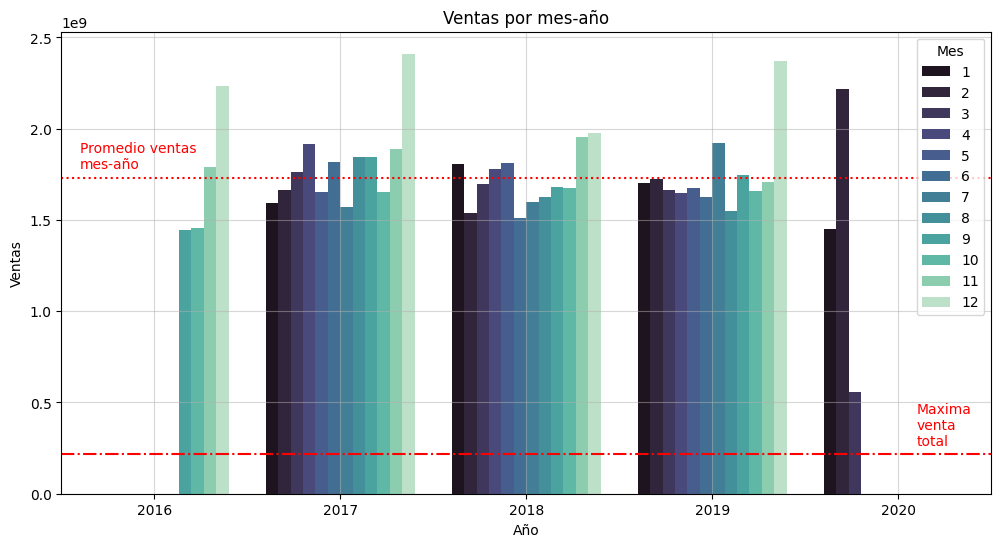

In [55]:
# Agrupando información según Año y Mes
ventas_month_year = data.groupby(['Año','Mes'])[['Ventas']].sum()
# Ajustando las columnas para gráficar
ventas_month_year.reset_index(inplace=True)
# Configuraciones iniciales
fig,ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Año',y='Ventas',data=ventas_month_year,hue='Mes',palette='mako',ax=ax).set(title='Ventas por mes-año')
# Añado lineas horizontales con texto
plt.axhline(data.Ventas.max(),c='red',linestyle='-.')
plt.text(4.1,data.Ventas.max()*1.2,'Maxima\nventa\ntotal',fontsize=10,color='red')
plt.axhline(ventas_month_year.Ventas.mean(),c='red',linestyle=':')
plt.text(-0.4,ventas_month_year.Ventas.mean()*1.03,'Promedio ventas\nmes-año',fontsize=10,color='red')
plt.grid(alpha=0.5)
plt.show()

In [56]:
# Datos generales en ventas Mes y Año
datos_ventas(ventas_month_year)

 Promedio de las ventas totales: 1730839106.8837209
 Desviación estandar de las ventas totales: 287702558.3326821
 Venta máxima: 2410962298
 Venta miníma: 559348111


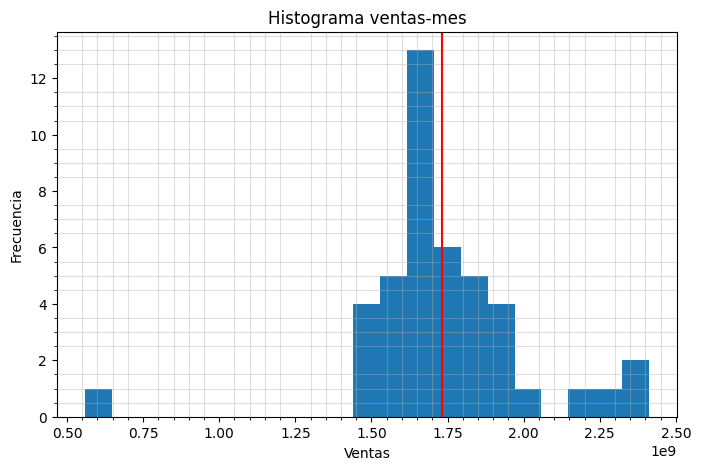

In [57]:
# Histograma de ventas
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(x=ventas_month_year.Ventas,bins=len(ventas_month_year)//2)
ax.set(title='Histograma ventas-mes',
       xlabel='Ventas',
       ylabel='Frecuencia')
# Añado linea vertical
ax.axvline(ventas_month_year.Ventas.mean(),c='red')
# Añado grilla con ejes pequeños
ax.grid(alpha=0.4,which='minor')
ax.minorticks_on()

**Ventas totales**

In [58]:
print(f'Ventas totales: {data.Ventas.sum()}')

Ventas totales: 74426081596


Se verifica el impacto de los ultimos meses

In [59]:
febrero_2020 = data.loc[(data['Año']==2020) & (data['Mes']==2)]
febrero_2020.head(1)

,IdCliente,NombreCliente,Fecha,Empleado,Referencia,Descripcion,CodigoFamilia,Familia,Cantidad,Ventas,Localidad,Sede,Area,Año,Mes
123203,C1003474875,LÓPEZ YOMAYUZA ALBA VERÓNICA,2020-02-01,14.0,SE-CS-10-0005,CALIBRACION AIRE MOTO,106.0,SERVICIOS,1,1000,Engativa,Calle 80,31.0,2020,2


In [60]:
impacto_febrero_2020 = febrero_2020.groupby(['Familia'])[['Ventas']].sum()
impacto_febrero_2020

,Ventas
Familia,
FILTROS,3539743
LLANTA,1519396550
LUBRICANTES,6761248
REENCAUCHE,295290289
SERVICIOS,393969325


In [61]:
marzo_2020 = data.loc[(data['Año']==2020) & (data['Mes']==3)]
marzo_2020.head(1)

,IdCliente,NombreCliente,Fecha,Empleado,Referencia,Descripcion,CodigoFamilia,Familia,Cantidad,Ventas,Localidad,Sede,Area,Año,Mes
126303,C1003474875,LÓPEZ YOMAYUZA ALBA VERÓNICA,2020-03-02,44.0,SE-CS-10-0005,CALIBRACION AIRE MOTO,106.0,SERVICIOS,1,1000,Engativa,Calle 80,31.0,2020,3


In [62]:
impacto_marzo_2020 = marzo_2020.groupby(['Familia'])[['Ventas']].sum()
impacto_marzo_2020

,Ventas
Familia,
FILTROS,653205
LLANTA,295026116
LUBRICANTES,1474773
REENCAUCHE,148210176
SERVICIOS,113983841


La venta principal son las llantas y es donde hubo mas grandes cambios

In [63]:
llanta_febrero = impacto_febrero_2020.iloc[1][0]
llanta_marzo = impacto_marzo_2020.iloc[1][0]
reduccion = round((1-(llanta_marzo/llanta_febrero))*100,1)
print(f"Se presenta una reducción de {reduccion}% en ventas de llantas")

Se presenta una reducción de 80.6% en ventas de llantas


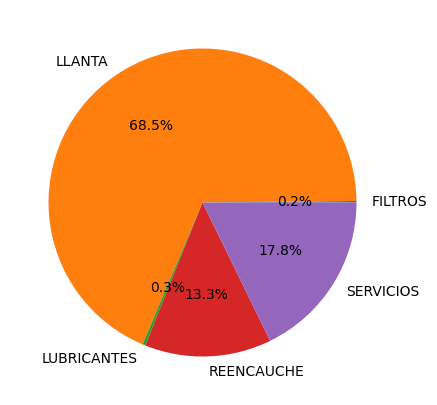

In [64]:
f, a = plt.subplots(figsize=(6,5))
a.pie(x=impacto_febrero_2020.Ventas,labels=impacto_febrero_2020.index,autopct="%1.1f%%");

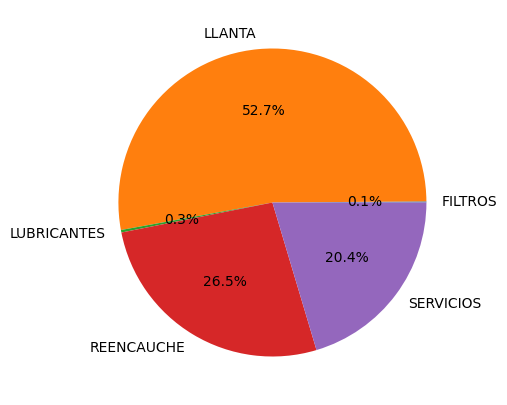

In [65]:
f, a = plt.subplots(figsize=(6,5))
a.pie(x=impacto_marzo_2020.Ventas,labels=impacto_marzo_2020.index,autopct="%1.1f%%");

Como se evidencia en los gráficos se presenta una reducción de al menos un 18% de las ventas generales de la empresa.

**Cantidad de elementos vendidos**

In [66]:
print(f'Cantidad de elementos vendidos: {data.Cantidad.sum()}')

Cantidad de elementos vendidos: 317139


**Ganancia Facturación Total de Servicios**

In [67]:
data.Familia.unique()

array(['LLANTA', 'SERVICIOS', 'FILTROS', 'LUBRICANTES', 'REENCAUCHE'],
      dtype=object)

In [68]:
ganancia_ventas = data.loc[data.Familia=='SERVICIOS','Ventas'].sum()
print(f'Ganancia facturación total de servicios: {ganancia_ventas}')

Ganancia facturación total de servicios: 11266569989


**Cantidad de Servicios Ofrecidos**

In [69]:
servicios = data.loc[data.Familia == 'SERVICIOS','Cantidad'].sum()
print(f'La Cantidad de Servicios ofrecidos es: {servicios}')

La Cantidad de Servicios ofrecidos es: 213395


**Cantidad de sedes o ubicaciones disponibles**

In [70]:
sedes = data.Sede.nunique()
print(f'Cantidad de sedes o ubicaciones: {sedes}')

Cantidad de sedes o ubicaciones: 7


**Ventas totales por sedes en cada rubro o familia y servicios**

In [71]:
test = data.groupby(['Sede','Familia'])[['Ventas']].sum()

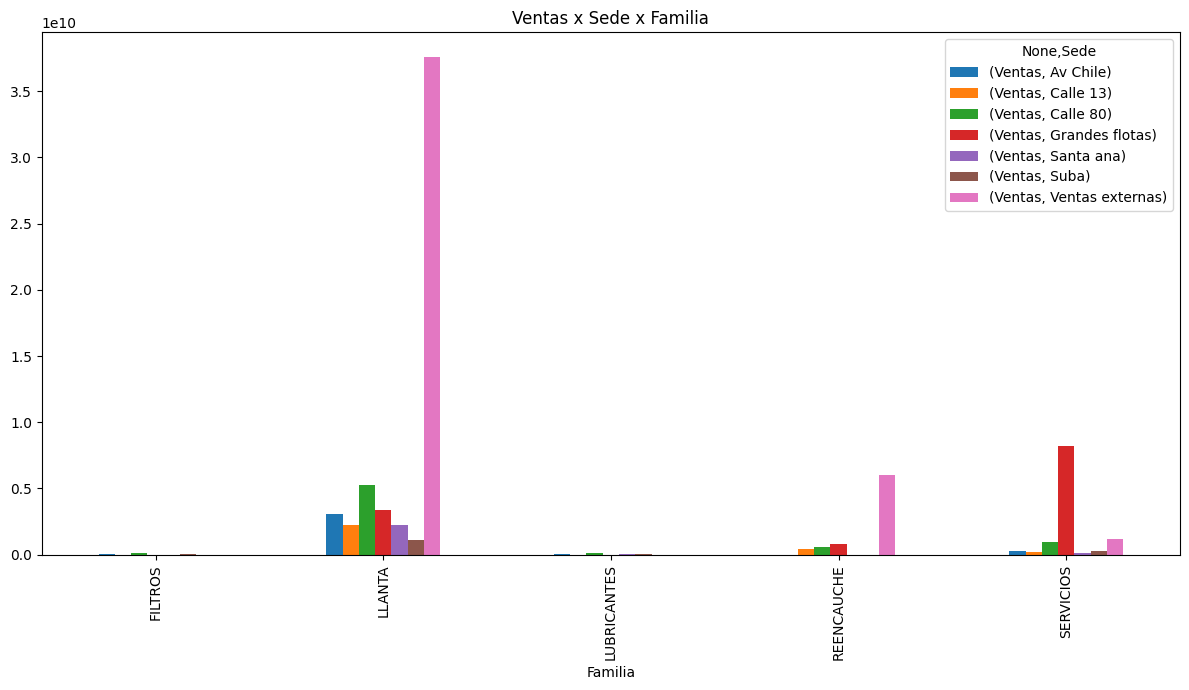

In [72]:
test.unstack(level=0).plot.bar(figsize=(12,7))
plt.title("Ventas x Sede x Familia")
plt.tight_layout()

In [75]:
ventas_sede_fam_fecha = data.groupby(['Sede','Familia','Año'])[['Ventas']].sum()

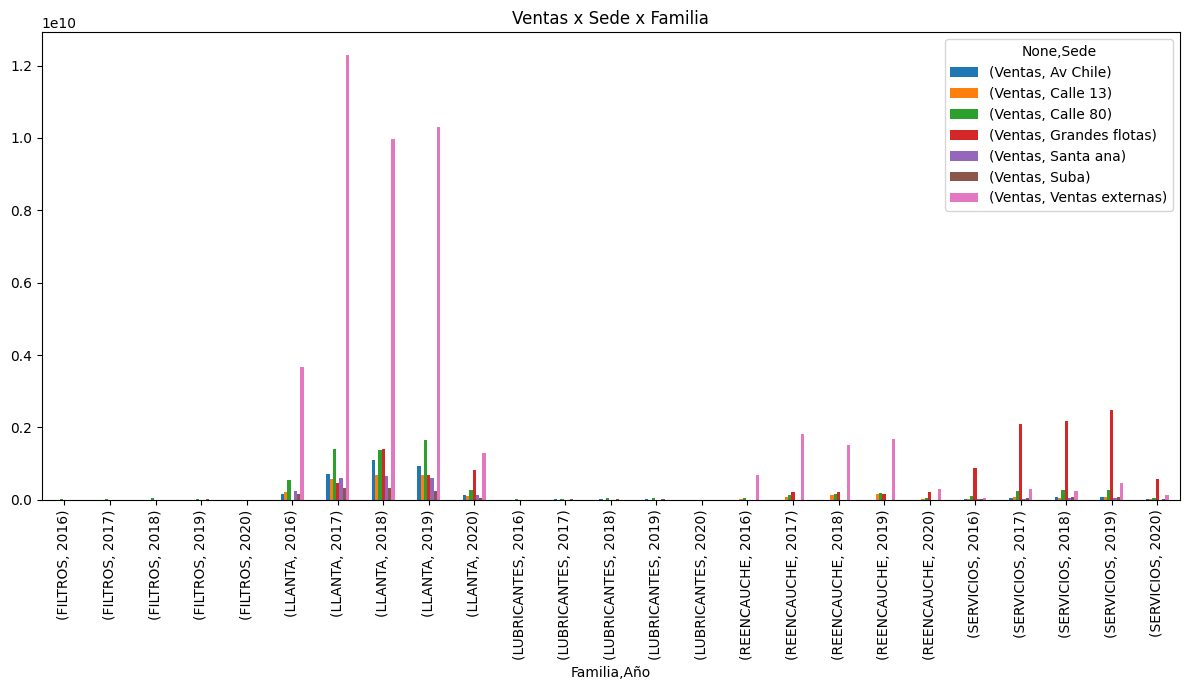

In [76]:
ventas_sede_fam_fecha.unstack(level=0).plot.bar(figsize=(12,7))
plt.title("Ventas x Sede x Familia")
plt.tight_layout()

In [80]:
llantas_externas = data.loc[(data['Familia']=='LLANTA') & (data['Sede']=='Ventas externas')]
reencauche_externas = data.loc[(data['Familia']=='REENCAUCHE') & (data['Sede']=='Ventas externas')]
servicios_grandes_flotas = data.loc[(data['Familia']=='SERVICIOS') & (data['Sede']=='Grandes flotas')]

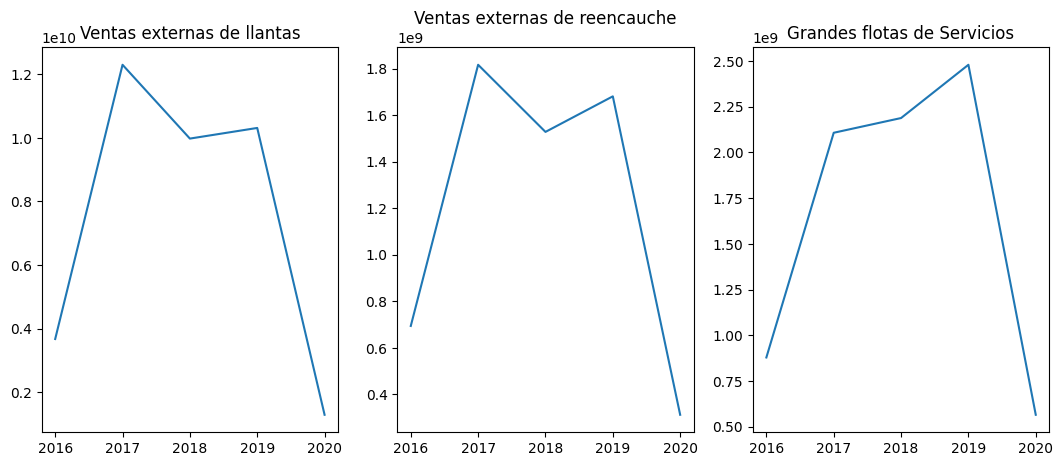

In [93]:
le = llantas_externas.groupby('Año')[['Ventas']].sum()
re = reencauche_externas.groupby('Año')[['Ventas']].sum()
sgf = servicios_grandes_flotas.groupby('Año')[['Ventas']].sum()

f, a = plt.subplots(nrows=1,ncols=3,figsize=(13,5))
a[0].plot(le.index,le.Ventas)
a[0].set(title="Ventas externas de llantas")
a[1].plot(re.index,re.Ventas)
a[1].set(title="Ventas externas de reencauche")
a[2].plot(sgf.index,sgf.Ventas)
a[2].set(title="Grandes flotas de Servicios");

Ventas externas el mayor vendedor de llantas

**Ventas realizadas por sus empleados** 

In [98]:
empleados = pd.read_csv('Empleados.csv',sep=';')
empleados.head()

,Id_Empleado,Nombre y Apellido
0,1,Juan Pastran
1,2,Esteban Damico
2,3,Julian Quevedo
3,4,Oscar Rosseto
4,5,Valentin Quintero


In [25]:
# Ajuste de tabla
empleados.reset_index(drop=True,inplace=True)
empleados.set_index('Id_Empleado',inplace=True)
empleados.head()

,Nombre y Apellido
Id_Empleado,
1,Juan Pastran
2,Esteban Damico
3,Julian Quevedo
4,Oscar Rosseto
5,Valentin Quintero


In [26]:
# Ventas x Empleado
ventas_empleado = data.groupby(['Empleado','Año'])[['Ventas']].sum()
ventas_empleado.reset_index(inplace=True)
ventas_empleado.set_index('Empleado',inplace=True)
ventas_empleado['nombre_empleado'] = empleados['Nombre y Apellido']
ventas_empleado.head()


,Año,Ventas,nombre_empleado
Empleado,,,
1.0,2016,414330047,Juan Pastran
1.0,2017,1201673960,Juan Pastran
1.0,2018,2266331747,Juan Pastran
1.0,2019,1148014210,Juan Pastran
1.0,2020,687972691,Juan Pastran


In [45]:
ventas_empleado.loc[ventas_empleado['Año']==2020].nlargest(10,'Ventas')

,Año,Ventas,nombre_empleado
Empleado,,,
2.0,2020,1862089022,Esteban Damico
1.0,2020,687972691,Juan Pastran
3.0,2020,467821981,Julian Quevedo
29.0,2020,275353600,Mathiel Perizo
41.0,2020,180732123,Pelaytat Axel
45.0,2020,120125451,Nicolas Castro
50.0,2020,119552321,Thian Navarro
56.0,2020,92930144,Theo Fernandez
44.0,2020,91539733,Juan Casivar


In [46]:
ventas_empleado.loc[ventas_empleado['Año']==2020].nsmallest(10,'Ventas')

,Año,Ventas,nombre_empleado
Empleado,,,
20.0,2020,436978,Gonzalo Valdez
57.0,2020,991868,Alejandro Gimenez
68.0,2020,1966386,Adrian Ortiz
65.0,2020,2650422,Leonardo Perez
55.0,2020,2650731,Giovanni Chacon
6.0,2020,26208535,Marcelo Barrios
47.0,2020,26612473,Valentino Guiñez
63.0,2020,30725534,Francisco Caballero
67.0,2020,31913456,Esteban Vera


In [47]:
ventas_empleado.loc[ventas_empleado['Año']==2017].nlargest(10,'Ventas')

,Año,Ventas,nombre_empleado
Empleado,,,
2.0,2017,11953076718,Esteban Damico
3.0,2017,2412245929,Julian Quevedo
1.0,2017,1201673960,Juan Pastran
10.0,2017,1109174107,Adrian Lucero
12.0,2017,580696581,Marcos Luna
6.0,2017,567328651,Marcelo Barrios
29.0,2017,505564467,Mathiel Perizo
36.0,2017,492499843,Luis Barquiel
14.0,2017,413269572,Javier Garay


In [48]:
ventas_empleado.loc[ventas_empleado['Año']==2017].nsmallest(10,'Ventas')

,Año,Ventas,nombre_empleado
Empleado,,,
9.0,2017,36134,Marco Delgado
46.0,2017,100168,Dylan de los Ríos
16.0,2017,149151,Alejo Alfaro
28.0,2017,773950,Yair Muñoz
42.0,2017,1335295,Julián Soria
11.0,2017,1872269,Omar Pacheco
40.0,2017,3716207,Gian Cabrera
31.0,2017,6049632,Joaquín Grecco
35.0,2017,9608902,Ian Acosta


In [27]:
# Ventas cada año x empleado
ventas_2017 = ventas_empleado.loc[ventas_empleado['Año']==2017]
ventas_2018 = ventas_empleado.loc[ventas_empleado['Año']==2018]
ventas_2019 = ventas_empleado.loc[ventas_empleado['Año']==2019]
ventas_2020 = ventas_empleado.loc[ventas_empleado['Año']==2020]

In [28]:
top_2017 = ventas_2017[['nombre_empleado','Ventas']].nlargest(10,'Ventas')
top_2018 = ventas_2018[['nombre_empleado','Ventas']].nlargest(10,'Ventas')
top_2019 = ventas_2019[['nombre_empleado','Ventas']].nlargest(10,'Ventas')
top_2020 = ventas_2020[['nombre_empleado','Ventas']].nlargest(10,'Ventas')

In [39]:
peores_2017 = ventas_2017[['nombre_empleado','Ventas']].nsmallest(10,'Ventas')
peores_2018 = ventas_2018[['nombre_empleado','Ventas']].nsmallest(10,'Ventas')
peores_2019 = ventas_2019[['nombre_empleado','Ventas']].nsmallest(10,'Ventas')
peores_2020 = ventas_2020[['nombre_empleado','Ventas']].nsmallest(10,'Ventas')

In [29]:
top_2017

,nombre_empleado,Ventas
Empleado,,
2.0,Esteban Damico,11953076718
3.0,Julian Quevedo,2412245929
1.0,Juan Pastran,1201673960
10.0,Adrian Lucero,1109174107
12.0,Marcos Luna,580696581
6.0,Marcelo Barrios,567328651
29.0,Mathiel Perizo,505564467
36.0,Luis Barquiel,492499843
14.0,Javier Garay,413269572


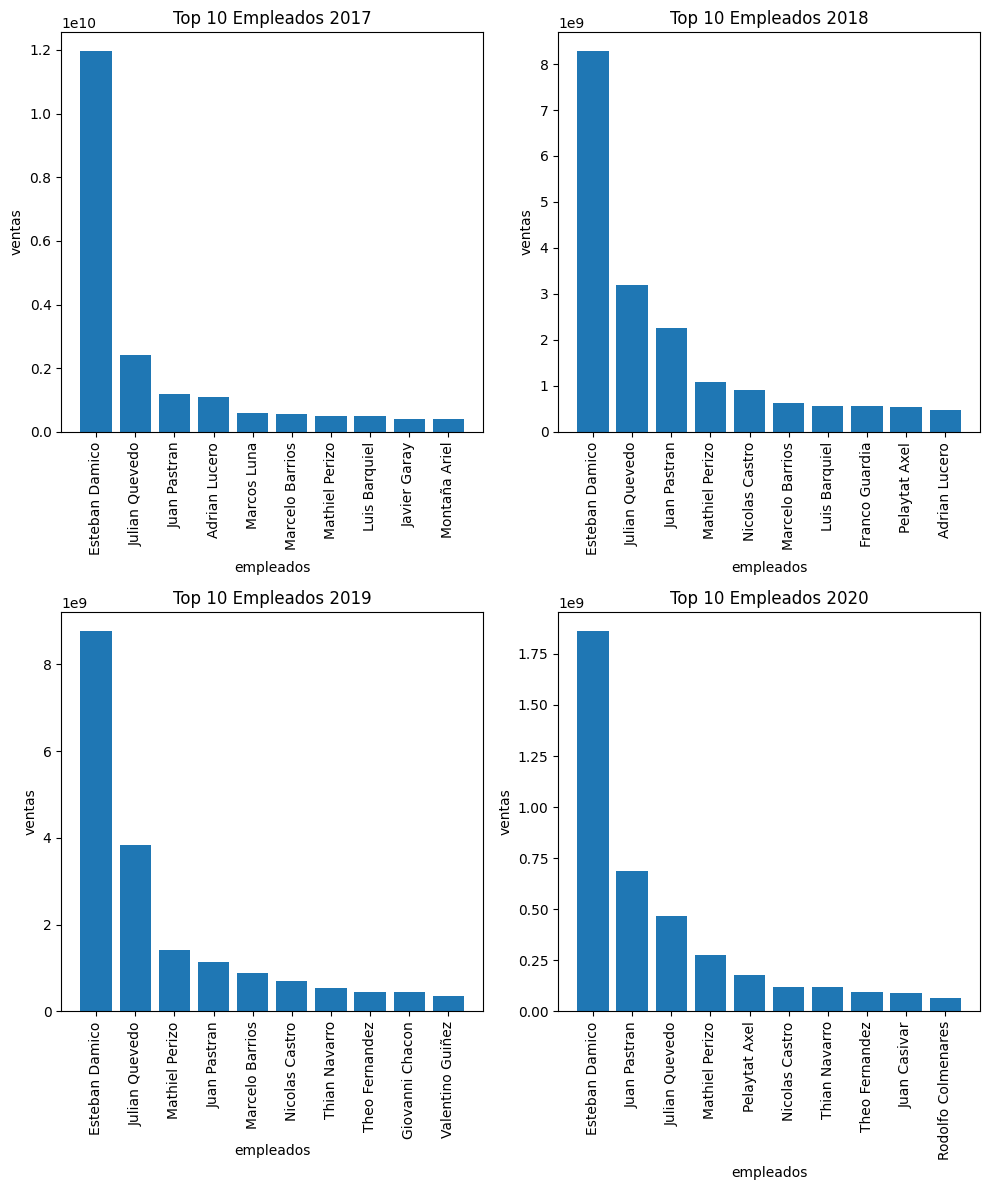

In [30]:
fig,((ax0,ax1),(ax2,ax3)) = plt.subplots(nrows=2,ncols=2,figsize=(10,12))


ax0.bar(top_2017['nombre_empleado'],top_2017['Ventas'])
ax0.tick_params(axis='x',labelrotation=90)
ax0.set(title='Top 10 Empleados 2017',
        xlabel='empleados',
        ylabel='ventas')

ax1.bar(top_2018['nombre_empleado'],top_2018['Ventas'])
ax1.tick_params(axis='x',labelrotation=90)
ax1.set(title='Top 10 Empleados 2018',
        xlabel='empleados',
        ylabel='ventas')

ax2.bar(top_2019['nombre_empleado'],top_2019['Ventas'])
ax2.tick_params(axis='x',labelrotation=90)
ax2.set(title='Top 10 Empleados 2019',
        xlabel='empleados',
        ylabel='ventas')

ax3.bar(top_2020['nombre_empleado'],top_2020['Ventas'])
ax3.tick_params(axis='x',labelrotation=90)
ax3.set(title='Top 10 Empleados 2020',
        xlabel='empleados',
        ylabel='ventas')

plt.tight_layout()

In [31]:
ventas_empleado_impacto = data.groupby(['Empleado','Año','Familia'])[['Ventas']].sum()
ventas_empleado_impacto.reset_index(inplace=True)
ventas_empleado_impacto.set_index('Empleado',inplace=True)
ventas_empleado_impacto['nombre_empleado'] = empleados['Nombre y Apellido']
ventas_empleado_impacto.head()

,Año,Familia,Ventas,nombre_empleado
Empleado,,,,
1.0,2016,FILTROS,90906,Juan Pastran
1.0,2016,LLANTA,19968509,Juan Pastran
1.0,2016,LUBRICANTES,1302645,Juan Pastran
1.0,2016,REENCAUCHE,1004000,Juan Pastran
1.0,2016,SERVICIOS,391963987,Juan Pastran


In [32]:
impacto_2020 = ventas_empleado_impacto.loc[ventas_empleado_impacto['Año']==2020]
impacto_2020.nlargest(10,'Ventas')

,Año,Familia,Ventas,nombre_empleado
Empleado,,,,
2.0,2020,LLANTA,1481643252,Esteban Damico
1.0,2020,SERVICIOS,388227321,Juan Pastran
3.0,2020,LLANTA,319633885,Julian Quevedo
2.0,2020,REENCAUCHE,289042788,Esteban Damico
1.0,2020,LLANTA,206250247,Juan Pastran
29.0,2020,SERVICIOS,147788037,Mathiel Perizo
41.0,2020,LLANTA,143123706,Pelaytat Axel
3.0,2020,REENCAUCHE,104802603,Julian Quevedo
45.0,2020,LLANTA,104168505,Nicolas Castro


In [33]:
impacto_esteban_2020 = ventas_empleado_impacto.loc[(ventas_empleado_impacto['nombre_empleado']=='Esteban Damico') &
                                              (ventas_empleado_impacto['Año']==2020)]
impacto_esteban_2020

,Año,Familia,Ventas,nombre_empleado
Empleado,,,,
2.0,2020,FILTROS,26890,Esteban Damico
2.0,2020,LLANTA,1481643252,Esteban Damico
2.0,2020,REENCAUCHE,289042788,Esteban Damico
2.0,2020,SERVICIOS,91376092,Esteban Damico


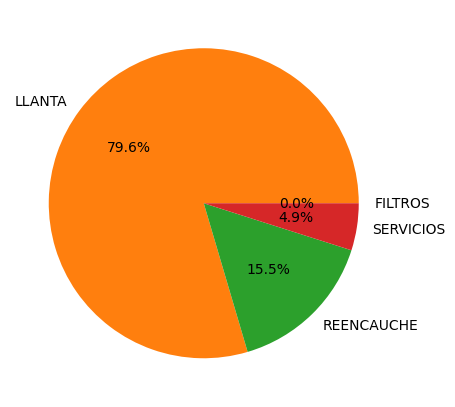

In [34]:
fig, ax = plt.subplots(figsize=(5,6))
ax.pie(impacto_esteban_2020.Ventas,labels = impacto_esteban_2020.Familia,autopct="%1.1f%%");

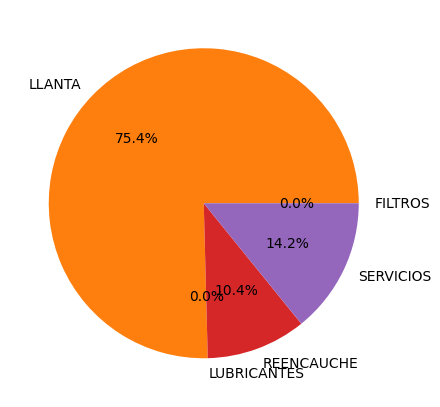

In [35]:
impacto_esteban_2017 = ventas_empleado_impacto.loc[(ventas_empleado_impacto['nombre_empleado']=='Esteban Damico') &
                                              (ventas_empleado_impacto['Año']==2017)]
fig, ax = plt.subplots(figsize=(5,6))
ax.pie(impacto_esteban_2017.Ventas,labels = impacto_esteban_2017.Familia,autopct="%1.1f%%");

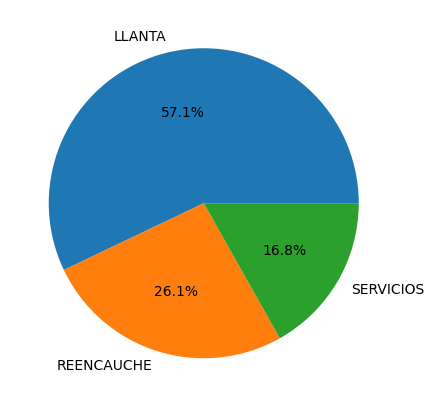

In [41]:
impacto_mathiel_2017 = ventas_empleado_impacto.loc[(ventas_empleado_impacto['nombre_empleado']=='Mathiel Perizo') &
                                              (ventas_empleado_impacto['Año']==2017)]
fig, ax = plt.subplots(figsize=(5,6))
ax.pie(impacto_mathiel_2017.Ventas,labels = impacto_mathiel_2017.Familia,autopct="%1.1f%%");

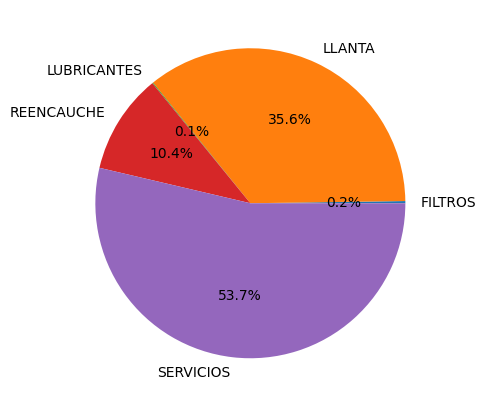

In [42]:
impacto_mathiel_2020 = ventas_empleado_impacto.loc[(ventas_empleado_impacto['nombre_empleado']=='Mathiel Perizo') &
                                              (ventas_empleado_impacto['Año']==2020)]
fig, ax = plt.subplots(figsize=(5,6))
ax.pie(impacto_mathiel_2020.Ventas,labels = impacto_mathiel_2020.Familia,autopct="%1.1f%%");

In [55]:
print(f'Mathiel Perizo perdidas: {round((1-275353600/505564467)*100,1)}%')
print(f'Esteban Damico perdidas: {round((1-1862089022/11953076718)*100,1)}%')

Mathiel Perizo perdidas: 45.5%
Esteban Damico perdidas: 84.4%


**Ranking de ventas / servicios de Empleados**

In [36]:
ranking_servicio = data.groupby('Familia')[['Ventas']].sum()
ranking_servicio

,Ventas
Familia,
FILTROS,172601580
LLANTA,54859167274
LUBRICANTES,314205968
REENCAUCHE,7813536785
SERVICIOS,11266569989


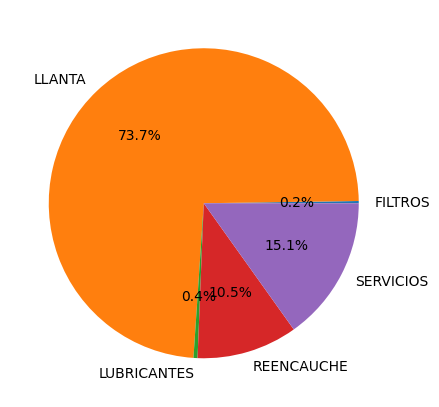

In [37]:
fig, ax = plt.subplots(figsize=(5,6))
ax.pie(ranking_servicio.Ventas,labels = ranking_servicio.index,autopct="%1.1f%%");

In [38]:
data.to_csv('cleaning-ventas.csv')